In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image

import torch
import imgaug.augmentables as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

from src.east_utils import get_input_image_and_bboxes, scale_bboxes, create_ground_truth
from src.datasets.sroie import get_image_and_bboxes

In [3]:
image_path = '../../sroie/SROIE2019/0325updated.task1train(626p)/X51005605333.jpg'

In [4]:
image, bboxes = get_image_and_bboxes(image_path)

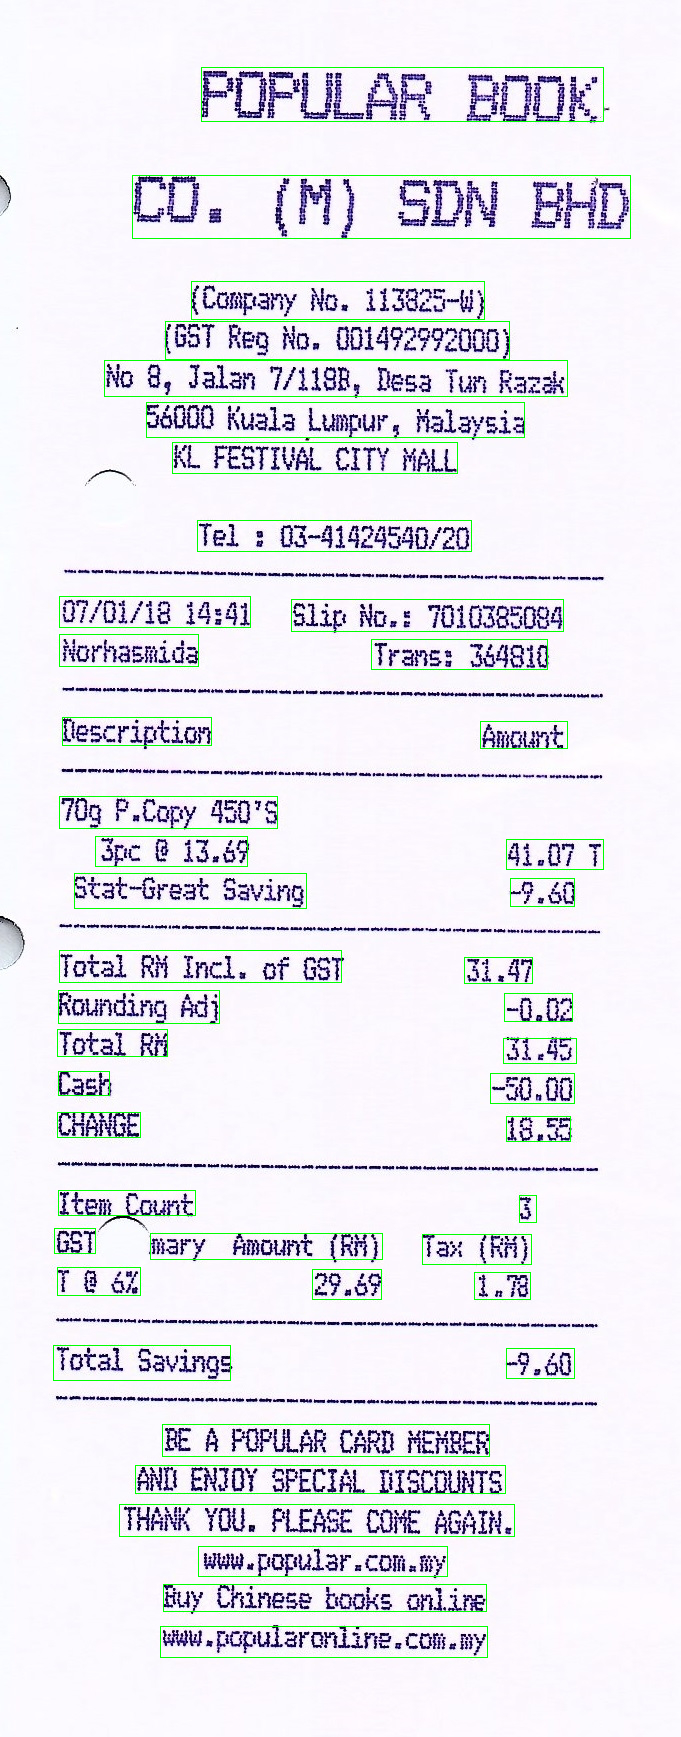

In [5]:
Image.fromarray(bboxes.draw_on_image(image))

# Augmentations

In [6]:
augmentations = iaa.Sequential([
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
        rotate=(-2,2),
        cval=255,
    ),
    iaa.Grayscale(alpha=1.0),
    iaa.AdditiveGaussianNoise(scale=(0., 0.1*255)),
    iaa.SigmoidContrast(gain=(3, 10), cutoff=(0.4, 0.6))
])

In [7]:
image_aug, bboxes_aug = augmentations(image=image, bounding_boxes=bboxes)

In [8]:
iaa.Grayscale(alpha=1.0)(image=image)

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[253, 253, 253],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

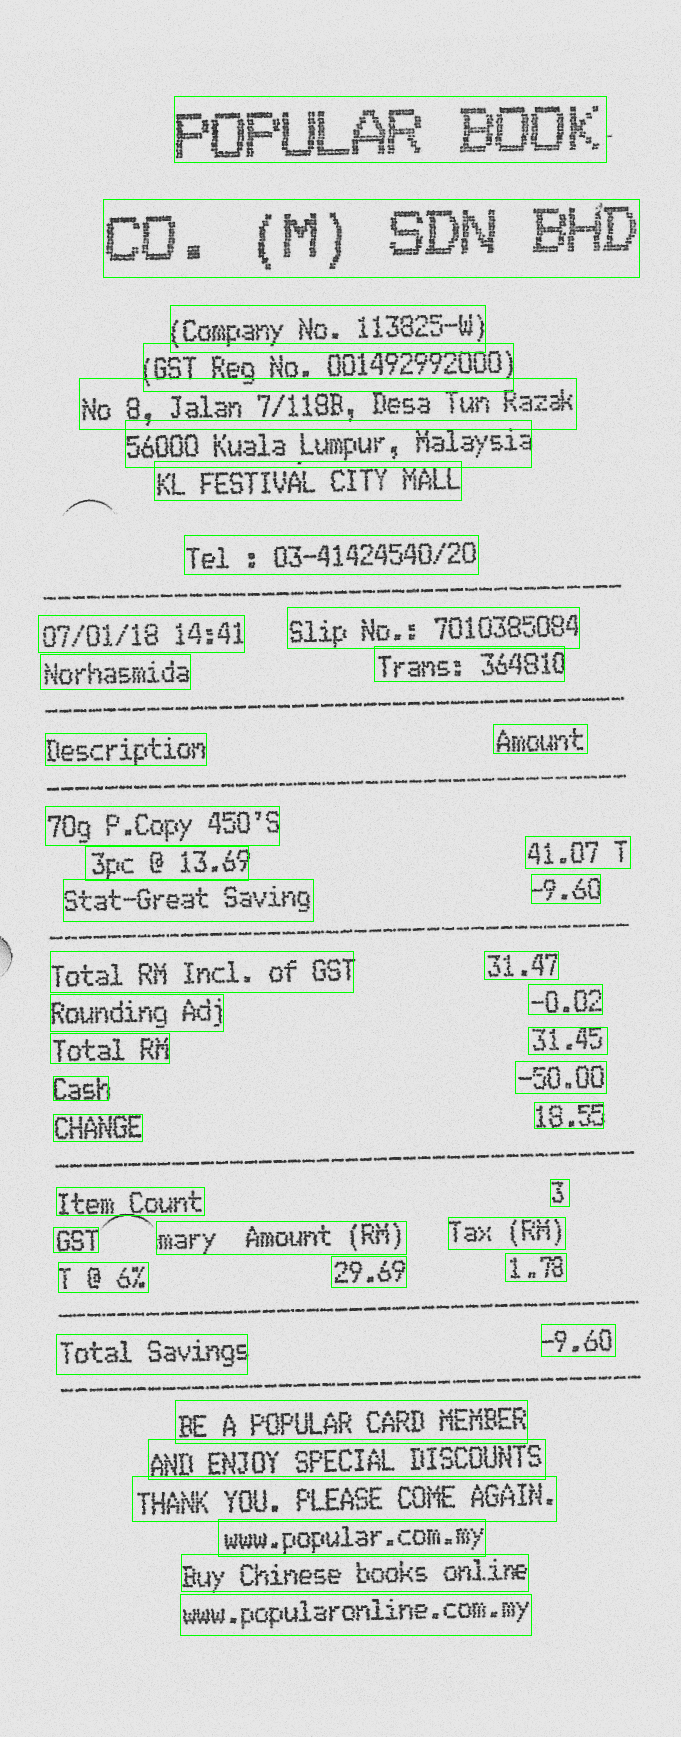

In [9]:
Image.fromarray(bboxes_aug.draw_on_image(image_aug))

# GT

In [10]:
size = (1024, 512)
scale = 4

In [11]:
image_gt, bboxes_gt = get_input_image_and_bboxes(
                image_aug, bboxes_aug, image_size=size, scale=scale)

In [12]:
boxes, mask_boxes = scale_bboxes(bboxes_gt, pct=0.7)

gt_image, loss_mask = create_ground_truth(boxes, mask_boxes, size, scale)

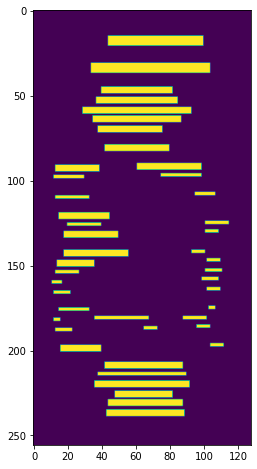

In [13]:
plt.figure(figsize=(15,8))
plt.imshow(gt_image[0])

In [14]:
def decaying(start, stop, decay):
    """Yield an infinite series of linearly decaying values."""

    curr = float(start)
    while True:
        yield max(curr, stop)
        curr -= decay

In [15]:
decay = decaying(0.9, 0.0, 1e-4)

In [17]:
next(decay)

0.8999